# Practical - 2
## Aim:
Implementation of Unsupervised Learning Algorithms from Scratch
## Problem Definition :
Download an unlabeled dataset (.csv) and implement the different unsupervised learning algorithms (k-means. Also, implement reinforcement learning. Understand the methodologies, implementation details, and libraries of each of the learning algorithms. Compare the performance of each algorithm for the given dataset.


## 1. K-Means Clustering

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [10]:
# Load the Iris dataset as an example
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels (not used for clustering)

In [11]:
# Data preprocessing (scaling the features)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Step 1: Determine the optimal number of clusters (K)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of K values to test
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

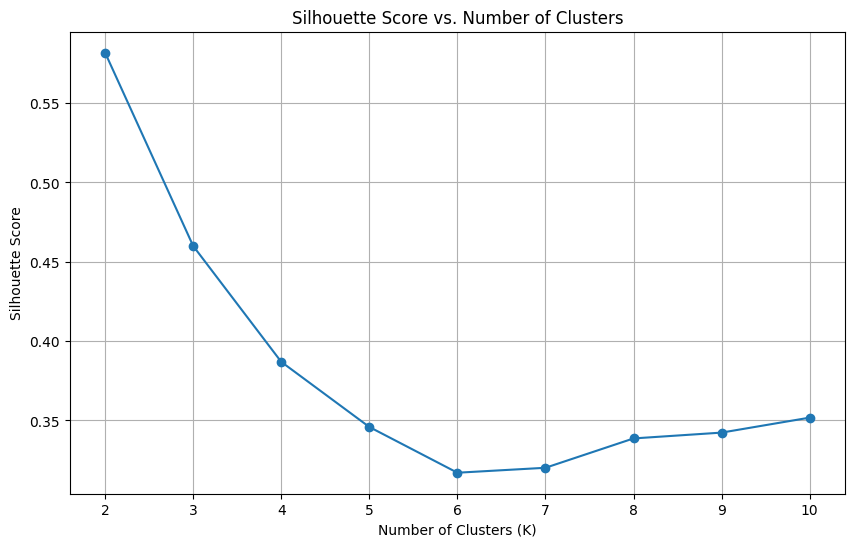

In [16]:
# Plot the silhouette scores to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()
# Based on the plot, choosing an appropriate K (e.g., K=3)

####  Step 2: Fit K-Means clustering model

In [17]:
optimal_k = 3  # Choose the optimal K from the plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

#### Step 3: Get cluster assignments and centers

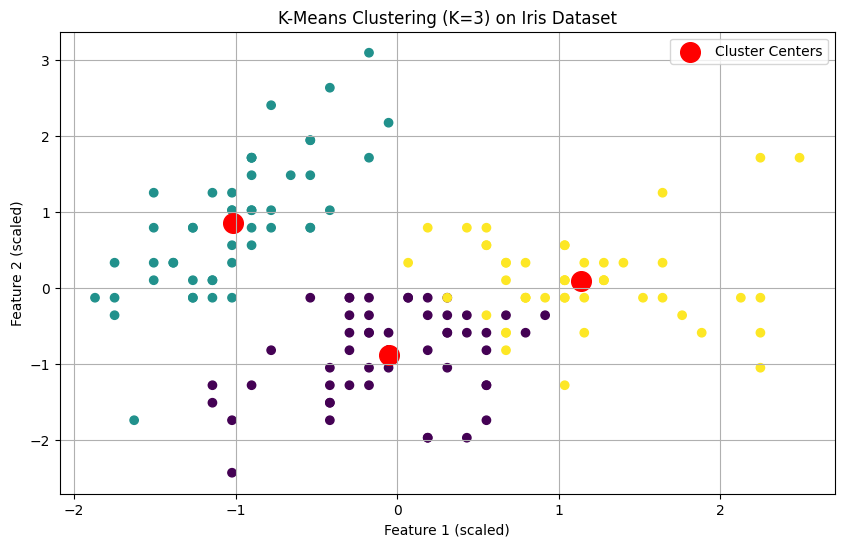

In [18]:

cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters (for simplicity, use the first two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.title("K-Means Clustering (K=3) on Iris Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid()
plt.show()

In [19]:
# Evaluate the clustering (optional)
from sklearn.metrics import completeness_score, homogeneity_score

completeness = completeness_score(y, cluster_assignments)
homogeneity = homogeneity_score(y, cluster_assignments)

print("Completeness Score:", completeness)
print("Homogeneity Score:", homogeneity)

Completeness Score: 0.659847677962776
Homogeneity Score: 0.659126501804901


## 2. Reinforcement Learning (ϵ (epsilon)-greedy algorithm)

In [20]:
#  import the necessary libraries and modules required
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

• This code imports the NumPy library and the random module.
• It also imports the pyplot module from the Matplotlib library and sets the plotting to be displayed inline.
• The line np.random.seed(5) sets the seed for the NumPy random number generator to 5, which ensures that the same random numbers are generated every time the code is run.
• This is useful for reproducibility in data analysis.
• Overall, this code sets up the necessary libraries and modules for data analysis and visualization, and ensures reproducibility of random number generation.

In [22]:
#  this code sets up the initial parameters for a multi-armed bandit problem with 10 arms and a 10-element array of random values for the reward probabilities of each arm.
n = 10
arms = np.random.rand(n)
eps = 0.1 #probability of exploration action

This code snippet initializes three variables.
• The first variable n is assigned the value of 10.
• The second variable arms is assigned an array of 10 random numbers between 0 and 1 using the np.random.rand() function from the NumPy library.
• The third variable eps is assigned the value of 0.1, which represents the probability of taking an exploration action in a multi-armed bandit problem.
• Overall, this code sets up the initial parameters for a multi-armed bandit problem with 10 arms and a 10-element array of random values for the reward probabilities of each arm.

In [23]:
# This function simulates a scenario where a reward is given based on a certain probability, and the function returns the number of times the reward was given out of 10 attempts.
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

This is a Python function called "reward" that takes in a probability value as an argument.
• The function initializes a variable called "reward" to 0 and then loops through a range of 10 values.
• Within the loop, the function checks if a randomly generated number between 0 and 1 is less than the probability value passed in as an argument.
• If it is, the "reward" variable is incremented by 1.
• After the loop completes, the function returns the final value of the "reward" variable.
• Overall, this function simulates a scenario where a reward is given based on a certain probability, and the function returns the number of times the reward was given out of 10 attempts.

The reward functions work as such - for each arm, you run a loop of 10 iterations, and generate a random float every time. If this random number is less than the probability of that arm, you'll add a 1 to the reward. After all iterations, you'll have a value between 0 to 10.

Why do you add a 1 only when the random number is less than the probability of that arm? Why not when it is more? The answer is, say you have a probability of 0.8 for an arm. You want 8 out of 10 times a positive response. That indicates that the positive response should be to the left of the probability value on the number line.

In [25]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value


This code initializes a memory array called av using the NumPy library.
• The array has one row and two columns, with the first column containing a random integer between 0 and n+1 (where n is a variable that has been defined elsewhere in the code) and the second column containing a 0.
• The reshape function is used to ensure that the array has the desired shape of 1 row and 2 columns.
• Overall, this code is creating a starting point for the memory array that will be used in a reinforcement learning algorithm.
• The first column represents the action index and the second column represents the action value.

In [26]:
#greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm


This code defines a function called bestArm that takes in an array a as its argument.
• The purpose of this function is to select the best arm (i.e., the best action to take) based on a memory array.
• The function initializes bestArm and bestMean to 0.
• It then loops through each element u in the input array a.
• For each element, it calculates the average reward for that action by using NumPy's mean function on a subset of a where the first column equals the current action.
• This is done using the where function to filter the array and then indexing the second column with [:, 1].
• If the calculated average reward is greater than the current bestMean, the bestMean and bestArm variables are updated to reflect the new best action.
• Finally, the function returns the bestArm value.
• Overall, this function implements a greedy algorithm to select the best action based on the average reward of each action in the memory array.

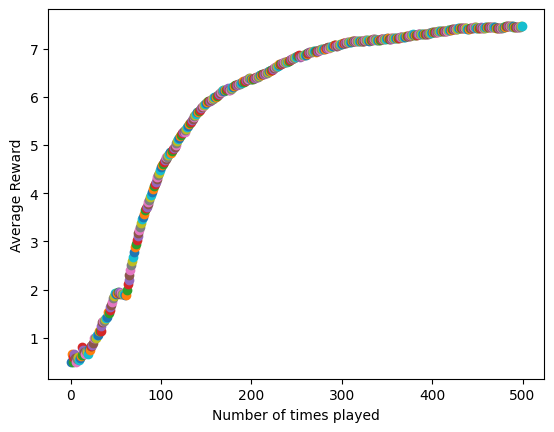

In [27]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(500):
    if random.random() > eps: #greedy exploitation action
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: #exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)


This code is implementing a reinforcement learning algorithm that uses the epsilon-greedy strategy to balance exploration and exploitation.
• The plt.xlabel() and plt.ylabel() functions are setting the labels for the x and y axes of a scatter plot that will be created later in the code.
• The for loop runs 500 times, and on each iteration, the algorithm chooses between exploration and exploitation based on a random number generated by random.random().
• If the random number is greater than the exploration rate eps, the algorithm chooses the arm with the highest expected reward (exploitation).
• If the random number is less than or equal to eps, the algorithm chooses a random arm (exploration).
• The bestArm() function is not shown in this code snippet, but it is likely a function that returns the index of the arm with the highest expected reward.
• The np.array() function creates a 2D array with the choice of arm and the reward obtained from that arm.
• The np.concatenate() function adds this array to a memory array av that stores all the previous choices and rewards.
• The np.mean() function calculates the mean reward obtained so far, and the plt.scatter() function adds a point to the scatter plot with the x-coordinate as the number of times played and the y-coordinate as the running mean reward.
• Overall, this code is implementing a simple reinforcement learning algorithm that balances exploration and exploitation to find the arm with the highest expected reward.